In [ ]:
##import the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##read the data
df = pd.read_csv("movies data.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#clean data
#check missing value
df.isna().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [ ]:
#drop missing values
df = df.dropna()

In [ ]:
#Check data type
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [ ]:
#change data types
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')



In [ ]:
#check duplicates
df.duplicated().sum()

0

In [ ]:
#EDA
#Summary Statistics to get summary of numeric columns.
print(df.describe())

              year        score         votes        budget         gross  \
count  5424.000000  5424.000000  5.424000e+03  5.424000e+03  5.424000e+03   
mean   2001.657633     6.391980  1.150102e+05  3.599814e+07  1.031803e+08   
std      10.543057     0.962722  1.843721e+05  4.156649e+07  1.872631e+08   
min    1980.000000     1.900000  1.950000e+02  6.000000e+03  3.090000e+02   
25%    1993.000000     5.800000  1.900000e+04  1.000000e+07  1.071797e+07   
50%    2002.000000     6.500000  5.200000e+04  2.165000e+07  3.685976e+07   
75%    2011.000000     7.100000  1.290000e+05  4.500000e+07  1.123733e+08   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  5423.000000  
mean    108.150655  
std      18.113254  
min      63.000000  
25%      95.000000  
50%     105.000000  
75%     118.000000  
max     271.000000  


In [ ]:
#check out popular director
print(df['director'].value_counts().head(10))

director
Woody Allen          33
Clint Eastwood       31
Steven Spielberg     27
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           23
Joel Schumacher      20
Tim Burton           19
Martin Scorsese      19
Barry Levinson       18
Name: count, dtype: int64


In [ ]:
#check out popular star
print(df['star'].value_counts().head(10))

star
Nicolas Cage          40
Tom Hanks             38
Robert De Niro        38
Bruce Willis          34
Tom Cruise            33
Denzel Washington     33
Sylvester Stallone    32
Johnny Depp           31
Adam Sandler          28
Eddie Murphy          27
Name: count, dtype: int64


In [ ]:
#Sort the gross column
df_sorted = df.sort_values(by=['gross'], ascending=False)
df_sorted.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


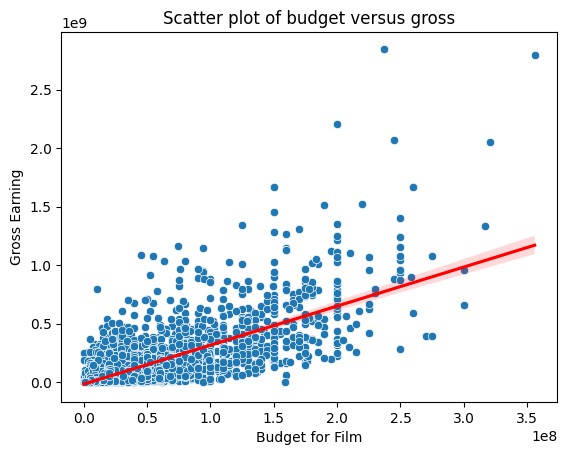

In [ ]:
#explore the correlation between variables
#Prediction of the variables that are correlated to gross income are:budget
#budget vs gross

import seaborn as sns
sns.scatterplot(x = 'budget', y = 'gross', data = df)
## plot the trendline
sns.regplot(x = 'budget', y = 'gross', data = df, scatter= False, color = 'red')
plt.title('Scatter plot of budget versus gross')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earning')
plt.show()


In [ ]:
numerical_columns = df[['gross', 'budget', 'runtime', 'score', 'year', 'votes']]

numerical_columns1 = pd.DataFrame(numerical_columns)

#calculate correlation matrix
corr_matrix = numerical_columns1.corr()

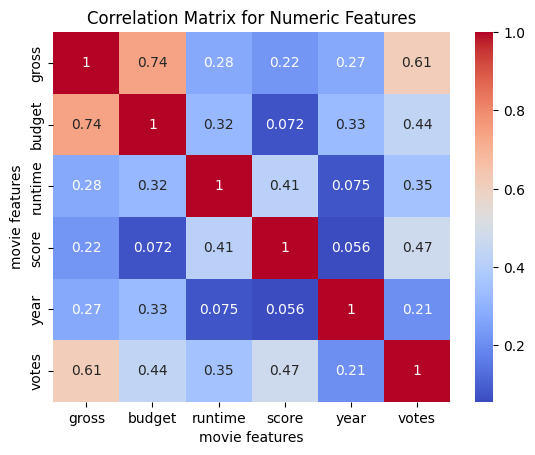

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()


#The variables with highest correction to gross income are budget and votes.
#The higher the budget the higher the gross income

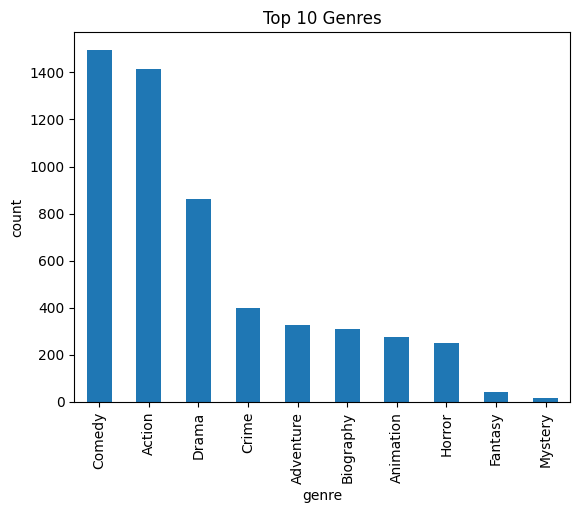

In [ ]:
#movie genres that are most prevalent
import seaborn as sns

df['genre'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('genre')
plt.ylabel('count')
plt.show()

#The graph shows the most prevalent genres are comedy, action and drama.

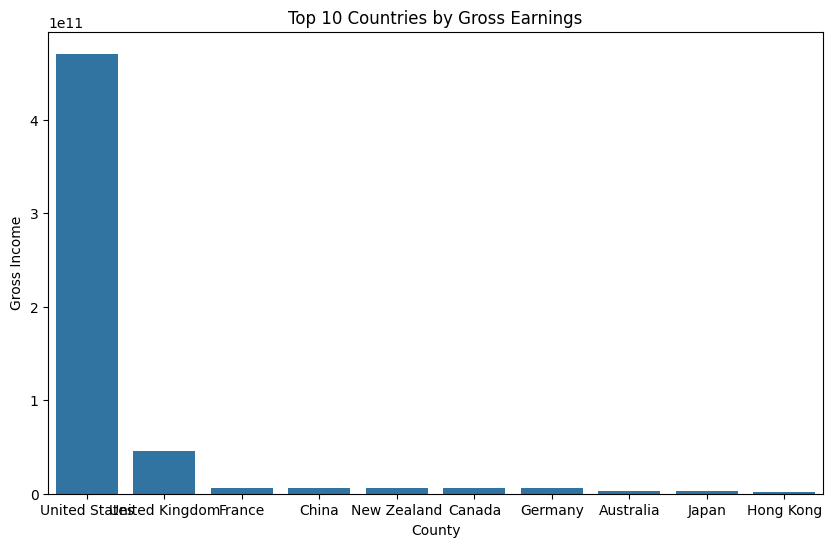

In [ ]:
# Bar plot for gross earnings by country
import seaborn as sns
df_grouped = df.groupby('country')['gross'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize = (10, 6))
sns.barplot(data=df_grouped, x="country", y="gross")
plt.title('Top 10 Countries by Gross Earnings')
plt.xlabel("County")
plt.ylabel("Gross Income")
plt.show()

#some contries such as USA dominate the movie industry in terms of gross income.